In [ ]:
# Workaround - geopandas overlay function works in colab
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
! pip install geopandas==0.5.1
# Install descartes - Geopandas requirment
!pip install descartes 


Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:13 https://developer.download.nv

In [ ]:
import geopandas as gpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Code to merge the shapefiles from overlapping tiles

def mergeOverlapShapes(shapefileList,saveFolder,saveName):
  """
  Function to merge the shapefile from overlapping tiles

  Parameters:

  shapefileList (list) = list with the path to the shapefiles.

  saveFolder (string) = path to save the result.

  saveName (string) = name of the saved file.

  """

  # List to store the overlapping shapefiles
  overlappingShapes = []

  # List to store all the shapefiles
  allShapes = []

  # Define the shapefileList variable
  shapefileList = shapefileList

  # Loop over all the shapefiles in the list
  for shapefile1 in shapefileList:
    # Load the first shapefile
    shape1 = gpd.read_file(shapefile1)

    # Loop over all the polygons in a file and store them in a list
    for shape in shape1["geometry"]:
        allShapes.append(shape)

      # Loop to compare the first shapefile with the other shapefiles 
    for shapefile2 in shapefileList:
      # if the files are the same, pass
      if shapefile1 == shapefile2:
        pass

      else:
        # Load the second shapefile
        shape2 = gpd.read_file(shapefile2)
        # Select the overlapping shapefiles from the first file (left)
        overlap_left = gpd.sjoin(shape1,shape2, how = "inner", op = "intersects")
        # Evaluate if x is overlap is empty (no overlaps)
        if overlap_left.empty:
            pass
        else:
          # Select the overlapping shapefiles from the second file (right)
          overlap_right  = gpd.sjoin(shape2, shape1, how='inner',op='intersects')
          #Overlay the union of both shapefiles
          union = gpd.overlay(overlap_left, overlap_right, how = "union")
          # Calculate the unary_union
          geoms = union.geometry.unary_union
          # Evalute if the Geometry is empty
          if (str(type(geoms)) == "<class 'shapely.geometry.collection.GeometryCollection'>"):
            pass
          else:
            overlappingShapes.append(geoms)

  # Evalute if sh list is empty (no overlaps)
  if overlappingShapes == []:
    print("No Overlapping Polygons, saving file with all the polygons.... ")
    df2 = gpd.geoseries.GeoSeries(allShapes)
    df2 = gpd.GeoDataFrame({'geometry': df2})
    df2.crs = {'init': 'epsg:32721'}
    df2.to_file(f"{saveFolder}/{saveName}.shp")
    df2.plot(cmap='cividis', alpha=0.7, edgecolor='black')
    
  else:  
    df3 = gpd.geoseries.GeoSeries(overlappingShapes)
    df3 = gpd.GeoDataFrame({'geometry': df3})
    df3.crs = {'init': 'epsg:32721'}
    df2 = gpd.geoseries.GeoSeries(allShapes)
    df2 = gpd.GeoDataFrame({'geometry': df2})
    df2.crs = {'init': 'epsg:32721'}
    df2 = gpd.overlay(df2,df3, how = "symmetric_difference")
    # Union of df2 (all shapes, but without the overlapping shapes) and df3(overlapping dissolved shapes)
    df2 = gpd.overlay(df2,df3,how = "union")
    # Save file
    df2.to_file(f"{saveFolder}/{saveName}.shp")
    df2.plot(cmap='cividis', alpha=0.7, edgecolor='black')

In [ ]:
# Test 

from glob import glob
# Get the shapefiles path 
getshapefiles = glob("/content/drive/My Drive/Tutorial_Mask_RCNN/Mask_RCNN/codigo_merge_e_overlap/test_PR2y/*.shp")
print(getshapefiles)
saveFolder = "/content/drive/My Drive/Tutorial_Mask_RCNN/Mask_RCNN/codigo_merge_e_overlap/test_results2"
saveName = "test_results2"


['/content/drive/My Drive/Tutorial_Mask_RCNN/Mask_RCNN/codigo_merge_e_overlap/test_PR2y/pred_image3.shp', '/content/drive/My Drive/Tutorial_Mask_RCNN/Mask_RCNN/codigo_merge_e_overlap/test_PR2y/pred_image4.shp', '/content/drive/My Drive/Tutorial_Mask_RCNN/Mask_RCNN/codigo_merge_e_overlap/test_PR2y/pred_image2_overlap.shp', '/content/drive/My Drive/Tutorial_Mask_RCNN/Mask_RCNN/codigo_merge_e_overlap/test_PR2y/pred_image1.shp', '/content/drive/My Drive/Tutorial_Mask_RCNN/Mask_RCNN/codigo_merge_e_overlap/test_PR2y/pred_image5.shp', '/content/drive/My Drive/Tutorial_Mask_RCNN/Mask_RCNN/codigo_merge_e_overlap/test_PR2y/pred_image0.shp']


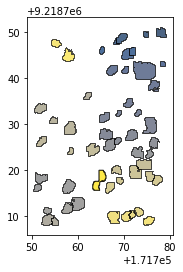

In [ ]:
mergeOverlapShapes(shapefileList=getshapefiles,
                   saveFolder = saveFolder,
                   saveName = saveName)

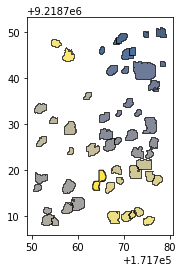

In [ ]:
# Deletar polígonos pequenos oriundos da conversão de raster pra shape
shapeUnited = gpd.read_file("/content/drive/My Drive/Tutorial_Mask_RCNN/Mask_RCNN/codigo_merge_e_overlap/test_results2/test_results2.shp")
#shapeUnited.area[0]
correctShapes = []
i = 0
for feature in shapeUnited["geometry"]:
  if shapeUnited.area[i] > 0.05:
    correctShapes.append(feature)
  i = i + 1

treeCrowns = gpd.geoseries.GeoSeries(correctShapes)
treeCrowns = gpd.GeoDataFrame({'geometry': treeCrowns})
treeCrowns.crs = {'init': 'epsg:32721'}
treeCrowns.to_file(f"/content/drive/My Drive/Tutorial_Mask_RCNN/Mask_RCNN/codigo_merge_e_overlap/test_results2/filteredCrowns.shp")
treeCrowns.plot(cmap='cividis', alpha=0.7, edgecolor='black')

In [ ]:
# Load shapefile
shapes = []
shapesUnion = []
getshapefiles = glob("/content/drive/My Drive/Mask_RCNN/codigo_merge_e_overlap/data_test/*[0-8].shp")
for shape1s in getshapefiles:
    shape1 = gpd.read_file(shape1s)
    for shape in shape1["geometry"]:
        shapesUnion.append(shape)
    for shape2s in getshapefiles:
        if shape2s == shape1s:
            pass
        else:
            shape2 = gpd.read_file(shape2s)
        # Select overlapping tiles 
            x = gpd.sjoin(shape1, shape2, how='inner',op='intersects')
            # evaluate if dataframe is empty
            if x.empty:
                pass
            else:
                y = gpd.sjoin(shape2, shape1, how='inner',op='intersects')
                j = gpd.overlay(x, y, how='union')
                geoms = j.geometry.unary_union
                if (str(type(geoms)) == "<class 'shapely.geometry.collection.GeometryCollection'>"):
                    pass
                else:
                    shapes.append(geoms)


if shapes == []:
    print("No Overlapping Polygons, saving file with all the polygons.... ")
    df2 = gpd.geoseries.GeoSeries(shapesUnion)
    df2 = gpd.GeoDataFrame({'geometry': df2})
    df2.crs = {'init': 'epsg:32723'}
    df2.to_file("df_final_test.geojson", driver='GeoJSON')
    
else:  
    df3 = gpd.geoseries.GeoSeries(shapes)
    df3 = gpd.GeoDataFrame({'geometry': df3})
    df3.crs = shape1.crs
    df2 = gpd.geoseries.GeoSeries(shapesUnion)
    df2 = gpd.GeoDataFrame({'geometry': df2})
    df2.crs = shape1.crs
    # df2 = gpd.overlay(df2,df3, how = "symmetric_difference")
    # Union of df2 (all shapes, but without the overlapping shapes) and df3(overlapping dissolved shapes)
    df2 = gpd.overlay(df2,df3,how = "union")
    df2.crs = shape1.crs
    # Save file
    df2.to_file("df_final.geojson", driver='GeoJSON')

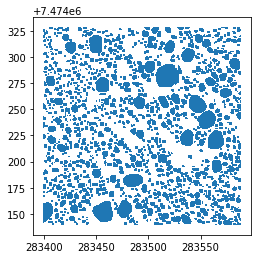

In [ ]:
df2.plot()

In [ ]:
0.5.1

SyntaxError: ignored